In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [6]:
# View all of the classes that  automap found
inspect(engine).get_table_names()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
 inspect(engine).get_columns('measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [10]:
name_list = []

for x in inspect(engine).get_columns('measurement'):
    name_list.append(x['name'])
name_list

['id', 'station', 'date', 'prcp', 'tobs']

In [11]:
[x['name'] for x in inspect(engine).get_columns('measurement')]

['id', 'station', 'date', 'prcp', 'tobs']

In [12]:
 inspect(engine).get_columns('station')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [13]:
[x['name'] for x in inspect(engine).get_columns('station')]

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

# Exploratory Precipitation Analysis

In [14]:
session.query(func.count(measurement.date)).all() 



[(19550,)]

In [15]:
# Find the most recent date in the data set.Ses
#session.query(measurement.date).order_by(measurement.date).first()

session.query(func.min(measurement.date)).first()[0]



'2010-01-01'

In [16]:
# Find the max date in the date set.
strDate = session.query(func.max(measurement.date)).first()[0]
strDate

'2017-08-23'

In [17]:
# Calculate the date one year from the last date in data set.
prev_year = dt.datetime.strptime(strDate,'%Y-%m-%d') - dt.timedelta(366)
prev_year

datetime.datetime(2016, 8, 22, 0, 0)

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Perform a query to retrieve the data and precipitation scores
data = session.query(measurement.date, measurement.prcp).filter(measurement.date>prev_year).all()
data



[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [19]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

#df = pd.DataFrame(data, columns=['Date','precipitation']).set_index('Date').sort_index()
df = pd.DataFrame(data, columns=['Date','precipitation']).set_index('Date').dropna().sort_index()
df

,precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


In [20]:
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
#ticks = [date for i,date in enumerate(df.index) if i % 250 == 0]
#ticks

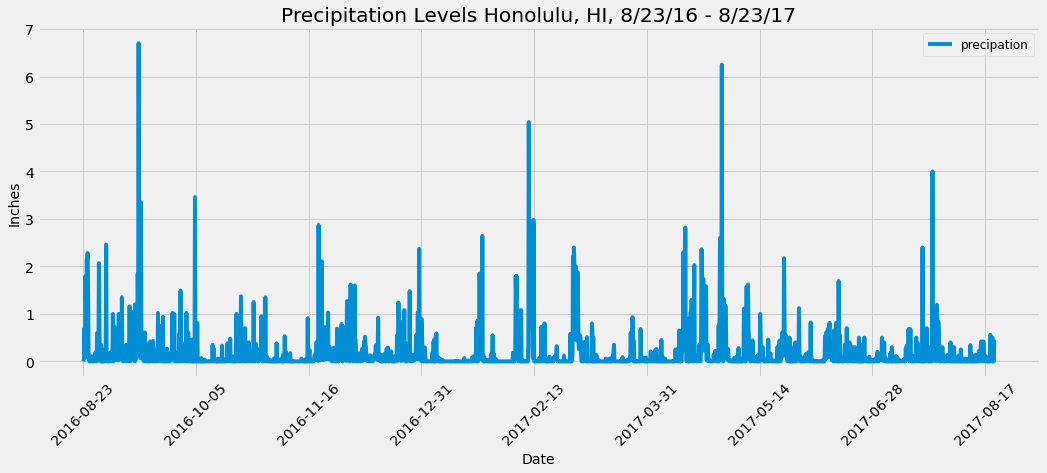

In [22]:
 # Use Pandas Plotting with Matplotlib to plot the datadf.plot(rot=45,figsize=(16,6),set_xlabel('tick_locations)).set_ylabel('Inches')
    
    
df.plot(rot=45,figsize=(16,6))
plt.title('Precipitation Levels Honolulu, HI, 8/23/16 - 8/23/17')
plt.ylabel('Inches', fontsize = (14))
plt.xlabel('Date', fontsize = (14))
plt.legend(['precipation'], loc = 'upper right', prop={'size': 12})
plt.show()

# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number stations in the dataset

station_count = session.query(measurement.station, func.count(measurement.station)).\
   group_by(measurement.station).all()

print("There are " + str(len(station_count)) + " stations.")




There are 9 stations.


In [24]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
for station, count in active_stations:
    print(station, count)
    
#active_stations

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

sel = [measurement.tobs]
session.query(func.min(*sel), func.max(*sel), func.avg(*sel)).filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#Query last 12 months but with temp and filter for most active station
temp = session.query(measurement.date, measurement.tobs).filter(measurement.date >= prev_year).\
    filter(measurement.station == "USC00519281").all()
temp

# Save the query results as a Pandas DataFrame and set the index to the date column

temp_df = pd.DataFrame(temp, columns=['Date','tobs']).set_index('Date')
temp_df


,tobs
Date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


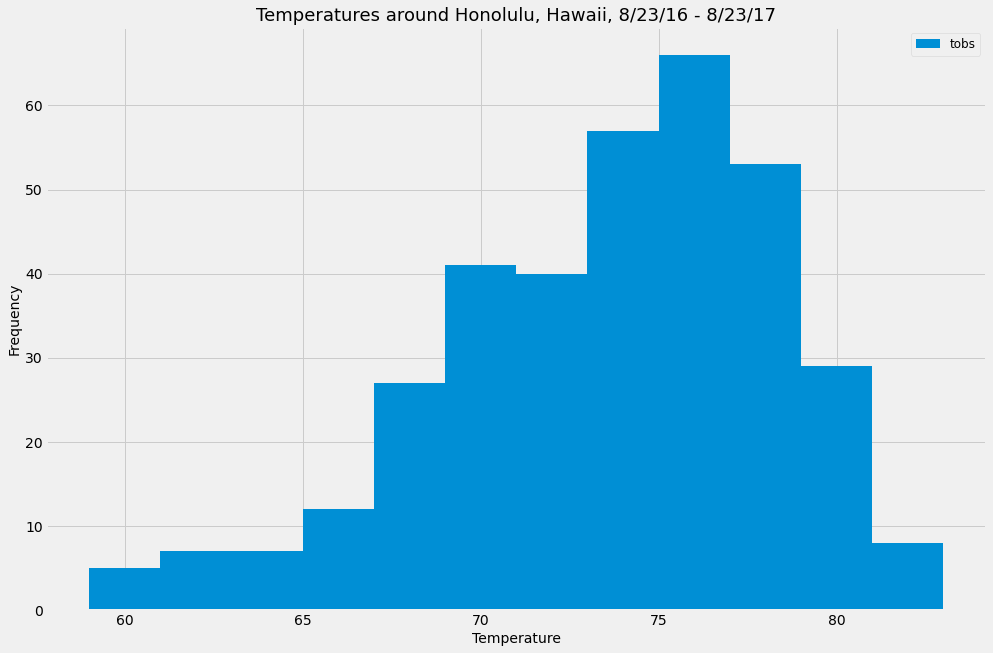

In [27]:

#Create a histogram of temperature observations
temp_df['tobs'].plot.hist(grid=True, figsize=(15, 10), bins = 12)
plt.xlabel("Temperature", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.legend(["tobs"], loc = "best", prop={"size": 12})
plt.title("Temperatures around Honolulu, Hawaii, 8/23/16 - 8/23/17", fontsize = 18)
#Display the plot
plt.show()

# Close session

In [28]:
# Close Session
session.close()